In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbrn

In [2]:
#Reading Dataset
df=pd.read_csv('50_Startups.csv')

# We will determine profit based on other parameters

# Data Preprocessing

In [3]:
df.info()#looking up dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#NOTE= 4th(State)coloumn is categorical coloumn

In [5]:
df.duplicated().sum()#checking duplicate values

0

In [6]:
df.isnull().sum()#checking null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

/Users/darshansatone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Profit'>

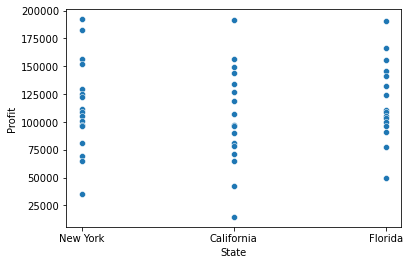

In [7]:
sbrn.scatterplot('State','Profit',data=df)#Vizualising relation between states and profit

/Users/darshansatone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Profit'>

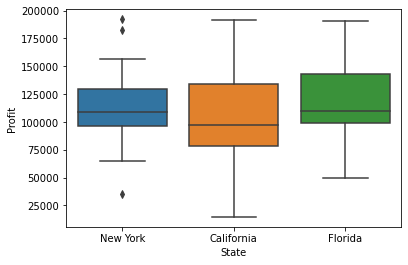

In [8]:
sbrn.boxplot('State','Profit',data=df)

In [9]:
#From above two graphs we can observe profit is varying with states,therefore we will consider states as feature

/Users/darshansatone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

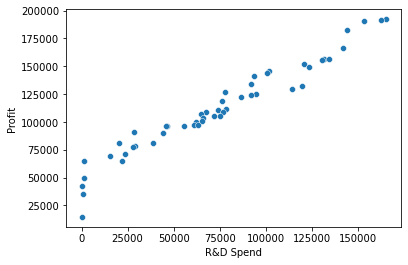

In [10]:
sbrn.scatterplot('R&D Spend','Profit',data=df)#Vizualising relation between R&D spend and profit

/Users/darshansatone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration', ylabel='Profit'>

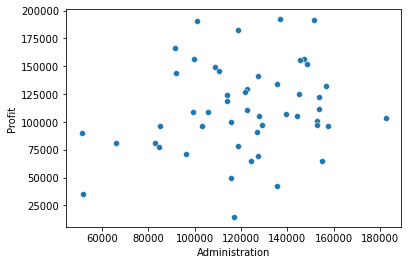

In [11]:
sbrn.scatterplot('Administration','Profit',data=df)#Vizualising relation between Administration and profit

/Users/darshansatone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

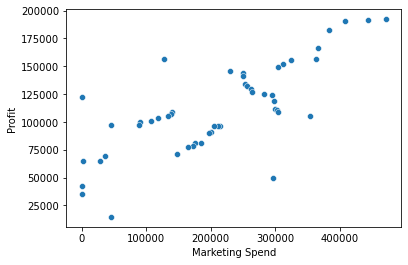

In [12]:
sbrn.scatterplot('Marketing Spend','Profit',data=df)#Vizualising relation between Marketing spend and profit

In [13]:
#From above graphs we can observe that our data is very much scattered so we will standardize data

In [14]:
#Creating dependent(Y) and independent(X) coloumn vectors
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [15]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [16]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [17]:
#Changing categorical data to numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[-1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [18]:
#Standerdizing Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [-7.17740563e-01, -6.85994341e-01,  1.393

In [22]:
#Splitting dataset into training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [23]:
#Creating the cost function
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [29]:
#Calculating weights and bais
w, b, cost= GradientDescent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 0.002,epochs=15000)

Cost is: 6778968876.921412
Cost is: 80220035.15638883
Cost is: 46057688.94013706
Cost is: 42212371.59249141
Cost is: 41179937.02288564
Cost is: 40894593.87015194
Cost is: 40815674.21890941
Cost is: 40793846.34673861
Cost is: 40787809.1143675
Cost is: 40786139.314625934


In [38]:
#now we will calculate weights and bais using tesing data
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(x_test, w, b)

In [40]:
test_df = pd.DataFrame()
test_df['Actual Values'] = y_test
test_df['Predicted values'] = y_pred
test_df

,Actual Values,Predicted values
0,103282.38,103015.964548
1,144259.40,132560.280252
2,146121.95,132419.473247
3,77798.83,71970.196965
4,191050.39,178510.636133
5,105008.31,116201.668721
6,81229.06,67863.609979
7,97483.56,98793.171685
8,110352.25,113979.632419
9,166187.94,167888.478955
